In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from mlp_ce import model




train_label = pd.read_csv('/Users/hongseoklee/VSCodeWorkspace/AIs/NCSoft/final_data/train/train_label.csv')
print(train_label)


train_activity = pd.read_csv('/Users/hongseoklee/VSCodeWorkspace/AIs/NCSoft/final_data/train/train_activity.csv')
print(train_activity)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10180 (39.77 KB)
Trainable params: 10180 (39.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
                                                  acc_id     label
0      b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...      week
1      ed500c4957956b3e99dc3985666850b582f812405eefb6...      week
2      acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...      week
3      34095a3c9

In [2]:
df = pd.merge(left = train_label , right = train_activity, how = "inner", on = "acc_id")



# 원하는 라벨 순서 정의
label_mapping = {'week':0, 'month':1, '2month':2, 'retained':3}

# 데이터프레임 열에 매핑 적용
df['label'] = df['label'].map(label_mapping)


categorical_features = ["acc_id"]
# for문을 사용하여 Label Encoding 적용
label_encoder = LabelEncoder()
for column in categorical_features:
    df[column] = label_encoder.fit_transform(df[column])


# 결과 출력



train_x = df.drop(labels = ["label", "acc_id"], axis = 1)
train_y = df["label"]


columns = train_x.columns

#print(train_x)

print(train_x.shape)

selected_features = ['item_hongmun', 'party_chat', 'cnt_dt', 'npc_hongmun', 'whisper_chat', 'wk', 'cnt_use_buffitem', 'get_money', 'quest_hongmun', 'guild_chat', 'game_combat_time', 'play_time']
train_x = train_x[selected_features]


#검증 데이터셋 추출
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)


model.fit(train_x, train_y, epochs=5, batch_size=32, validation_split=0.2)

# 훈련된 모델을 사용하여 검증 세트 예측
y_pred = model.predict(val_x)
y_pred = np.argmax(y_pred, axis=1)




(440323, 37)
Epoch 1/5
8807/8807 [==============================] - 6s 647us/step - loss: 1.0183 - accuracy: 0.5630 - val_loss: 0.9749 - val_accuracy: 0.5872
Epoch 2/5
8807/8807 [==============================] - 6s 635us/step - loss: 0.9558 - accuracy: 0.5936 - val_loss: 0.9542 - val_accuracy: 0.5946
Epoch 3/5
8807/8807 [==============================] - 6s 639us/step - loss: 0.9368 - accuracy: 0.6025 - val_loss: 0.9278 - val_accuracy: 0.6050
Epoch 4/5
8807/8807 [==============================] - 6s 633us/step - loss: 0.9260 - accuracy: 0.6069 - val_loss: 0.9201 - val_accuracy: 0.6112
Epoch 5/5
2753/2753 [==============================] - 1s 257us/step


In [3]:
# 분류 보고서 출력
print('Classification Report:')
print(classification_report(val_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66     15358
           1       0.60      0.36      0.45     19432
           2       0.44      0.69      0.54     19815
           3       0.74      0.67      0.70     33460

    accuracy                           0.60     88065
   macro avg       0.61      0.60      0.59     88065
weighted avg       0.63      0.60      0.60     88065



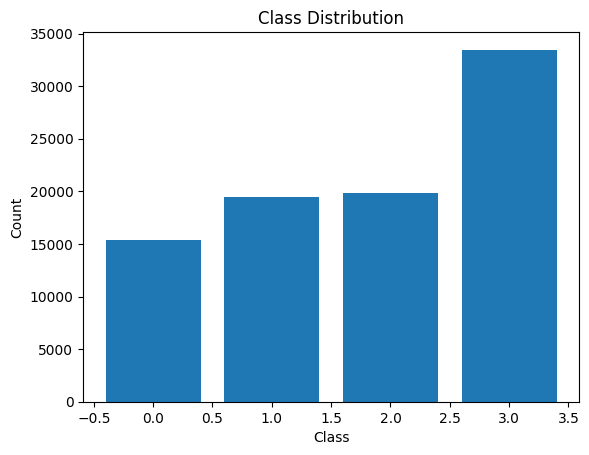

In [4]:
# 클래스 레이블과 개수 추출
labels = list(set(val_y))  # 중복을 제거한 클래스 레이블 리스트
counts = [list(val_y).count(label) for label in labels]  # 각 클래스별 개수 계산

# 막대 그래프 생성
plt.bar(labels, counts)

# 그래프에 레이블 추가
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# 그래프 표시
plt.show()

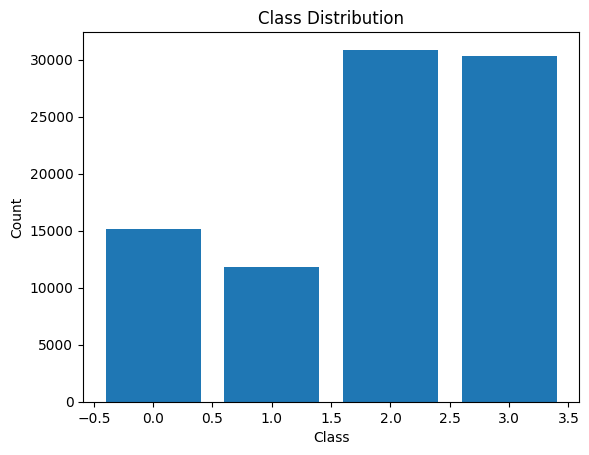

In [5]:
# 클래스 레이블과 개수 추출
labels = list(set(y_pred))  # 중복을 제거한 클래스 레이블 리스트
counts = [list(y_pred).count(label) for label in labels]  # 각 클래스별 개수 계산

# 막대 그래프 생성
plt.bar(labels, counts)

# 그래프에 레이블 추가
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# 그래프 표시
plt.show()